# Pairs Finding
1. use Hierarchical Clustering
2. use fundemental approach to find industry neutural pairs
3. use information 

In [2]:
from polygon.rest import RESTClient

client = RESTClient("5MKBfYvCSCPekWl824p5l2aSHIIjqh_p")
main_exchanges = ["XNYS", "XNAS", "XASE"] 
tickers = []
for ex in main_exchanges:
	for t in client.list_tickers(
		market="stocks",
		exchange=ex,
		active="true",
		order="asc",
		limit="100",
		sort="ticker",
	):
		tickers.append(t.ticker)

tickers = list(set(tickers))
print(tickers)


['GNTX', 'SPC', 'HSY', 'WKSP', 'INVH', 'CRUS', 'NXC', 'AG', 'CELGr', 'INTT', 'SUPV', 'AUNA', 'AFJKU', 'PEGA', 'LYG', 'RMI', 'AMKR', 'WFCpY', 'GEHC', 'GOODO', 'RHLD', 'CRMT', 'SIMAW', 'RUSH.B', 'AMPX.WS', 'GOVX', 'CAG', 'DCGO', 'FCTE', 'IZEA', 'HPK', 'GBCI', 'PSN', 'CCSB', 'EU', 'TZUP', 'VFSWW', 'KTB', 'BUFC', 'BIOA', 'SPKL', 'STSS', 'GETY', 'IJT', 'GJS', 'NRXP', 'BANR', 'NMR', 'NXL', 'CpN', 'ANNAW', 'EDU', 'ARW', 'EHLS', 'RHI', 'MHF', 'FARM', 'DKNG', 'INT', 'GFL', 'USGO', 'TRP', 'YRD', 'HBCP', 'NERD', 'OXLCN', 'WRB', 'MDB', 'PCGpG', 'X', 'UNIY', 'MYRG', 'RJF', 'BCGWW', 'DAIO', 'BIRD', 'KMPB', 'BULL', 'EGBN', 'TSPY', 'JVA', 'CTO', 'SBCF', 'JOYY', 'SSSS', 'CCAP', 'CRCT', 'RLTY', 'TSE', 'NXDT', 'AGNCO', 'DESP', 'KOD', 'AXSpE', 'LGCL', 'UTG', 'PCGpC', 'BTCS', 'FTAIN', 'AVAV', 'PSApR', 'CGABL', 'KELYA', 'CMC', 'PNI', 'CFO', 'FACTW', 'SEIC', 'HSON', 'SNRE', 'LANDO', 'RGEN', 'SNTG', 'PXSAW', 'NVCR', 'TBI', 'QQQX', 'SXTP', 'GTX', 'BDRX', 'AES', 'LDOS', 'EOSE', 'ARQT', 'JZXN', 'MMM', 'SE', 'DMN

In [3]:
aggs = []
for a in client.list_aggs(
        "AAPL",
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        aggs.append(a.close)
print(len(aggs))

1235


In [5]:

import pandas as pd
import numpy as np

df = pd.DataFrame(
    columns=tickers
)

for t in tickers:
    aggs = []
    for a in client.list_aggs(
        t,
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        
        aggs.append(a.close)
    if len(aggs) != 1235:
        continue
    df[t] = aggs


In [6]:
df = df.dropna(axis=1).copy()
train, test = df.iloc[:int(1235*0.8)].copy(), df.iloc[int(1235*0.8):].copy()
train_log = train.apply(lambda x: np.log(x))
train_standard = train_log.apply(lambda x: (x - x.mean())/ x.std())
X = train_standard.T 

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,978,979,980,981,982,983,984,985,986,987
GNTX,-2.048765,-1.893923,-1.872533,-1.801608,-1.387700,-1.513251,-1.822826,-2.056034,-2.034245,-1.990829,...,1.497191,1.433931,1.436373,1.533481,1.487489,1.492341,1.550364,1.468051,1.357905,1.436373
HSY,-1.904669,-1.900356,-1.885874,-1.932992,-1.829123,-1.838409,-1.857032,-1.880405,-1.913307,-1.938912,...,0.212034,0.060827,0.024277,0.099512,0.120467,0.219310,0.278180,0.130253,0.158709,0.100310
INVH,-2.969491,-2.736267,-2.884432,-2.393398,-2.296528,-2.180136,-2.544197,-2.590973,-2.575349,-2.550417,...,0.159073,0.113412,0.089383,0.225974,0.376985,0.262409,0.202303,0.191519,0.117773,0.197991
CRUS,-0.782554,-0.705730,-0.752657,-0.875224,-0.309047,-0.633005,-1.137337,-1.323962,-1.441600,-1.565991,...,1.141788,1.087709,1.001744,1.238974,1.294771,1.232651,1.217274,1.212746,1.103328,1.223609
AG,-0.299084,-0.312097,-0.388178,-0.247660,-0.276464,-0.435575,-0.398264,-0.487311,-0.401634,-0.102101,...,-1.440096,-1.455078,-1.490367,-1.327949,-1.188424,-1.038654,-0.946046,-0.536521,-0.540072,-0.438993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHTR,0.164335,0.148717,0.083309,0.154249,0.161272,0.130212,0.069143,0.043669,0.037606,0.079337,...,-1.848942,-1.848942,-1.881825,-1.813971,-1.848579,-1.927718,-2.004261,-2.033799,-2.091041,-2.139773
WD,-2.990026,-3.004729,-2.852547,-2.734845,-2.729745,-2.888846,-3.103779,-3.321079,-3.080157,-3.086755,...,0.143928,0.188124,0.216082,0.410324,0.419078,0.338089,0.224994,0.206430,0.233528,0.249472
CERS,0.448323,0.501409,0.490152,0.582083,0.549473,0.545816,0.592835,0.463635,0.455993,0.463635,...,-1.606012,-1.727824,-1.739276,-1.682665,-1.574039,-1.671533,-1.716438,-1.584640,-1.574039,-1.595297
NEEpN,0.463453,0.276510,0.409402,0.433447,0.588874,0.553139,0.642330,0.451457,0.337051,0.361204,...,-0.506401,-0.669569,-0.602182,-0.679219,-0.984531,-0.899504,-0.827906,-0.653499,-0.589379,-0.570192


In [8]:
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='single')
first_merges = Z[:3735//2]
first_merges

array([[1.43400000e+03, 2.19100000e+03, 4.02765623e-01, 2.00000000e+00],
       [3.25500000e+03, 3.73400000e+03, 4.45924793e-01, 3.00000000e+00],
       [3.87000000e+02, 1.28800000e+03, 5.03456375e-01, 2.00000000e+00],
       ...,
       [1.77900000e+03, 5.59700000e+03, 1.02060854e+01, 1.81500000e+03],
       [2.99500000e+03, 5.59800000e+03, 1.02070386e+01, 1.81600000e+03],
       [5.53000000e+02, 4.86800000e+03, 1.02084137e+01, 3.00000000e+00]],
      shape=(1867, 4))

In [9]:
from scipy.cluster.hierarchy import linkage
import heapq

def find_pairs_with_single_linkage(data):
    tickers = data.index.tolist()
    n = data.shape[0]
    Z = linkage(data, method='single')
    first_merges = Z[:n//2]

    pairs = []
    result = []
    for row in first_merges:
        idx1, idx2 = int(row[0]), int(row[1])
        if idx1 < n and idx2 < n:
            ticker1 = tickers[idx1]
            ticker2 = tickers[idx2]
            distance = row[2]
            heapq.heappush(pairs, (distance, ticker1, ticker2))
            if len(pairs) > 50:
                _, t1, t2 = heapq.heappop(pairs)
    
    while pairs:
        distance, t1, t2 = heapq.heappop(pairs)
        result.append((t1, t2, distance))

    result.reverse()
    return result

potential_pairs = find_pairs_with_single_linkage(X)
potential_pairs
    

[('HSY', 'PEP', np.float64(10.062029257020527)),
 ('CNP', 'KO', np.float64(9.9631604219864)),
 ('INN', 'RLJ', np.float64(9.901127776785689)),
 ('SAN', 'EUFN', np.float64(9.889960171238267)),
 ('OMCL', 'CLAR', np.float64(9.809417203581908)),
 ('SHO', 'XHR', np.float64(9.775776585977287)),
 ('MHK', 'LEVI', np.float64(9.760232672055412)),
 ('GBCI', 'CBSH', np.float64(9.71631767956037)),
 ('WHR', 'DLTH', np.float64(9.68271662475992)),
 ('KLIC', 'NAVI', np.float64(9.507312642287618)),
 ('FICO', 'PCAR', np.float64(9.488561702610301)),
 ('TQQQ', 'ADX', np.float64(9.488195208199443)),
 ('CMG', 'MANH', np.float64(9.469026474397735)),
 ('ENTA', 'PINC', np.float64(9.431258931488653)),
 ('AA', 'CDC', np.float64(9.401381995772745)),
 ('EL', 'UGI', np.float64(9.36260519694489)),
 ('BTAI', 'QURE', np.float64(9.21944459352011)),
 ('VRT', 'LII', np.float64(9.190115572400872)),
 ('GIB', 'CCEP', np.float64(9.186367231034001)),
 ('POLA', 'FORD', np.float64(9.185412971867047)),
 ('RIG', 'OII', np.float64(9

## Cointegration (Pairs validation)
We already find some pairs through clustering, now we need to validate these pairs from cointegration

In [10]:
from statsmodels.tsa.stattools import coint

def validate_pairs(df, pairs):
    result = []
    for t1, t2, _ in pairs:
        score, pvalue, _ = coint(df[t1], df[t2])

        result.append({
                'ticker1': t1,
                'ticker2': t2,
                'coint_score': score,
                'p_value': pvalue,
                'is_cointegrated': pvalue < 0.05  
            })
        
    result_df = pd.DataFrame(result)
    result_df = result_df.sort_values('p_value')
    
    return result_df

validate_pairs(train, potential_pairs)


,ticker1,ticker2,coint_score,p_value,is_cointegrated
43,ENSG,PFGC,-6.086465,0.000001,True
45,APLT,ABEO,-5.812576,0.000004,True
18,GIB,CCEP,-5.621435,0.000010,True
9,KLIC,NAVI,-5.599297,0.000011,True
41,TITN,RICK,-5.282685,0.000048,True
40,IESC,FTAI,-5.276359,0.000050,True
1,CNP,KO,-5.249609,0.000056,True
8,WHR,DLTH,-5.176052,0.000077,True
39,BMI,FLEX,-5.143613,0.000089,True
6,MHK,LEVI,-5.092944,0.000111,True


V, MA
SPFI, CCB
lEVI, MHK
MUFG UBS 
SYF	COF	


As we can see some of them are actually same company or same type of assets deliveried by different companies, after excluding such pairs, we still have about 5 pairs can be potential pairs targets, now let's pick one pair first (LEVI, MHK) to build some trading strategy

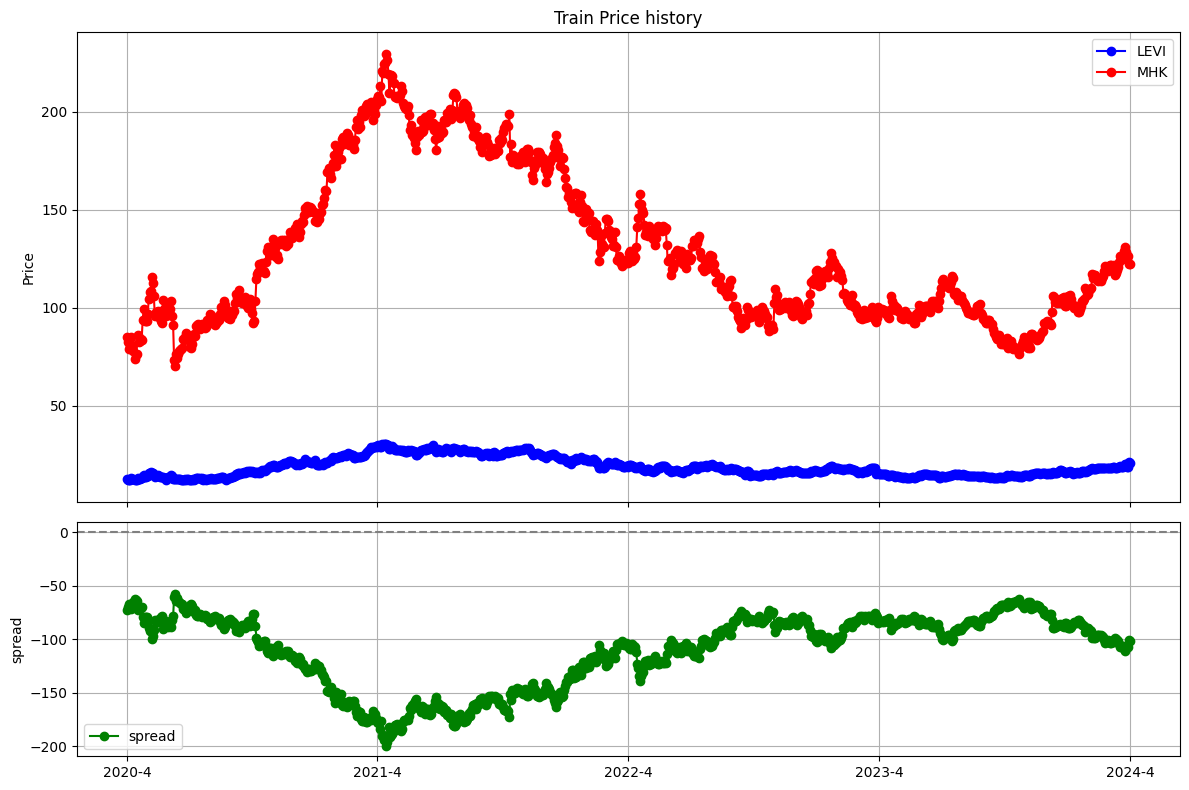

In [11]:
import matplotlib.pyplot as plt

def plot_price(a, b, train):

    stock_a = train[a]
    stock_b = train[b]
    spread = stock_a - stock_b

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    ax1.plot(stock_a, label=stock_a.name, color='blue', marker='o')
    ax1.plot(stock_b, label=stock_b.name, color='red', marker='o')
    ax1.set_title('Train Price history')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    data_length = len(stock_a)
    tick_positions = np.linspace(0, data_length-1, 5, dtype=int)
    tick_labels = ['2020-4', '2021-4', '2022-4', '2023-4', '2024-4']

    ax1.set_xticks(tick_positions)

    ax2.plot(spread, label='spread', color='green', marker='o')
    ax2.set_ylabel('spread')
    ax2.axhline(y=0, color='gray', linestyle='--') 
    ax2.grid(True)
    ax2.legend()

    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels(tick_labels)

    plt.tight_layout()
    plt.show()

plot_price("LEVI", "MHK", train)

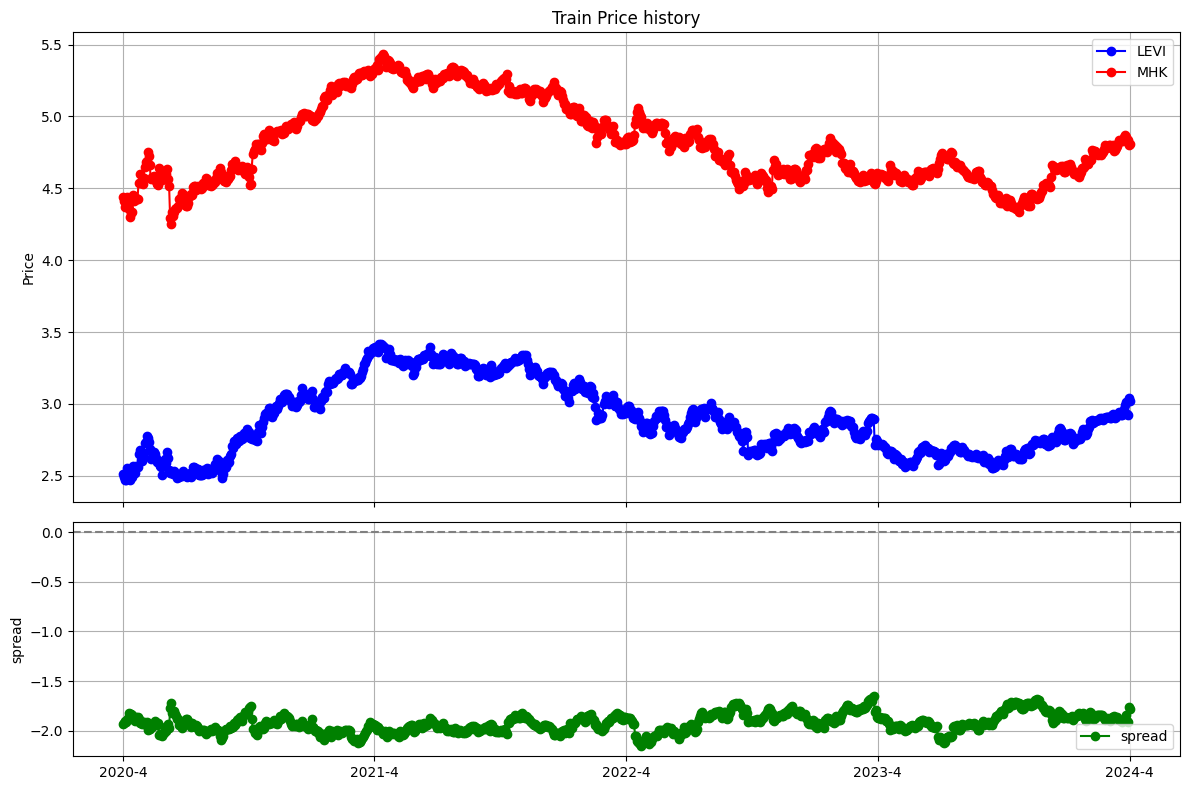

In [12]:
plot_price("LEVI", "MHK", train_log)

As we can see spread is jumping up and down around -2, which indicate good opportunity for pairs trading, let plot another one

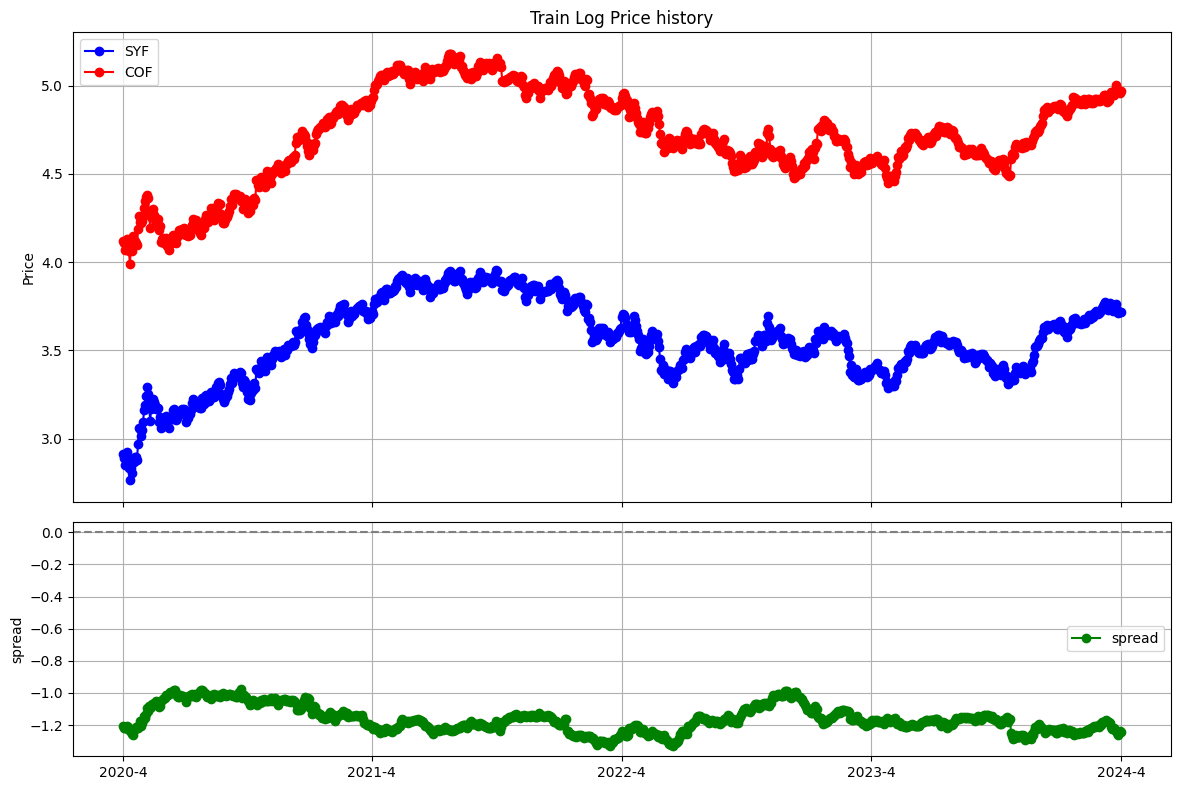

In [43]:
plot_price("SYF", "COF", train)

this above pair has some period with going up and down together period, which indicate we need to do some trend following strategy transition from pairs trading to increase profit

# Trading and Backtesting and forward testing

if the z score is too large, it means spread is too positive, so we long the l

In [71]:
test

,IBN,FDS,FICO,ATNM,LPL,JCE,GNL,EMX,GLO,EIM,...,AMAL,WAT,VRNT,JHX,TENX,IAC,UVV,EDD,VZ,PRTH
988,26.08,440.27,1238.88,9.13,4.09,13.86,7.53,1.92,5.090,10.130,...,22.87,339.04,31.71,39.81,3.9700,51.48,50.62,4.696,41.73,3.240
989,26.62,439.68,1219.08,8.98,4.07,13.86,7.63,1.96,5.080,10.160,...,23.00,345.03,33.05,38.80,3.9201,52.14,50.37,4.720,40.84,3.200
990,26.43,428.67,1181.23,8.99,3.99,13.67,6.86,1.96,5.010,10.060,...,22.11,337.15,31.21,38.27,3.8700,50.03,48.59,4.600,40.52,3.105
991,26.44,427.27,1191.68,9.09,3.96,13.83,6.83,2.05,5.060,10.050,...,21.96,337.89,30.87,37.63,3.8700,49.57,49.05,4.600,40.16,3.200
992,26.14,426.24,1175.61,9.00,3.75,13.57,6.78,1.92,5.010,10.085,...,21.98,322.66,30.26,36.66,3.7600,48.19,48.55,4.550,39.72,3.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,31.40,441.24,1887.00,1.87,3.25,14.62,7.99,2.07,4.960,9.960,...,29.59,367.79,21.62,23.85,6.1320,48.97,54.39,4.835,44.18,7.500
1231,31.31,449.23,1872.28,1.89,3.23,14.69,7.97,2.11,4.970,9.890,...,29.43,370.59,18.73,24.64,6.1800,48.86,56.43,4.860,44.96,7.430
1232,31.38,448.76,1835.24,1.81,3.15,14.42,8.00,2.05,4.910,9.950,...,28.70,362.16,17.85,24.25,6.4900,46.32,56.04,4.835,44.93,6.750
1233,31.52,454.64,1844.16,1.61,3.11,14.59,8.04,2.04,4.890,9.970,...,28.75,368.57,17.85,23.56,6.5500,45.94,56.05,4.700,45.36,6.815


In [24]:
def update_cost(current_position, current_cost, new_position, new_price):
    if current_position == 0:
        return new_price

    if new_position == 0:
        return current_cost
        
    if (current_position > 0 and new_position > 0) or (current_position < 0 and new_position < 0):
        total_position = abs(current_position) + abs(new_position)
        return ((abs(current_position) * current_cost) + (abs(new_position) * new_price)) / total_position
    else:
        net_position = current_position + new_position
        
        if net_position == 0:
            return 0
        
        if abs(net_position) < abs(current_position):
            return current_cost
        else:
            return new_price

In [101]:
def hybrid_trading_strategy(test_data, train_data, ticker1, ticker2):
    data = test_data.copy()

    spread_train = np.log(train_data[ticker1]) - np.log(train_data[ticker2])
    window = len(train_data) // 2

    data['spread'] = np.log(data[ticker1]) - np.log(data[ticker2])
    data['zscore'] = np.nan
    data[f'{ticker1}_strong_trend'] = (data[ticker1].rolling(10).mean() > data[ticker1].rolling(30).mean()) & (data[ticker1].rolling(5).mean() > data[ticker1].rolling(10).mean()) 
    data[f'{ticker2}_strong_trend'] = (data[ticker2].rolling(10).mean() > data[ticker2].rolling(30).mean()) & (data[ticker2].rolling(5).mean() > data[ticker2].rolling(10).mean())
        
    data[f'{ticker1}_position'] = 0
    data[f'{ticker2}_position'] = 0 
    data[f'{ticker1}_cost'] = 0
    data[f'{ticker2}_cost'] = 0
    data['strategy'] = 'none'
    data['close_action'] = False

    all_spreads = list(spread_train)

    for i in range(len(data)):
        all_spreads.append(data['spread'].iloc[i])
        
        recent_spreads = all_spreads[-window:]
        update_mean = np.mean(recent_spreads)
        update_std = np.std(recent_spreads)
        data.loc[data.index[i], 'zscore'] = (data['spread'].iloc[i] - update_mean) / update_std
    
    # blotter
    for i in range(1, len(data)):
        data.loc[data.index[i], f'{ticker1}_position'] = data[f'{ticker1}_position'].iloc[i-1]
        data.loc[data.index[i], f'{ticker2}_position'] = data[f'{ticker2}_position'].iloc[i-1]
        data.loc[data.index[i], f'{ticker1}_cost'] = data[f'{ticker1}_cost'].iloc[i-1]
        data.loc[data.index[i], f'{ticker2}_cost'] = data[f'{ticker2}_cost'].iloc[i-1]
        data.loc[data.index[i], 'strategy'] = data['strategy'].iloc[i-1]
        data.loc[data.index[i], 'close_action'] = False  
        
        price1 = data.loc[data.index[i], ticker1]
        price2 = data.loc[data.index[i], ticker2]
        
        ticker1_strong_up = data[f'{ticker1}_strong_trend'].iloc[i]
        ticker2_strong_up = data[f'{ticker2}_strong_trend'].iloc[i]
        
        current_zscore = data['zscore'].iloc[i]
        
        # trend following
        if data.loc[data.index[i], 'strategy'] == "mean_reversion":
            if ticker1_strong_up and not ticker2_strong_up:
                data.loc[data.index[i], 'strategy'] = 'trend_following'
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 100
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = price1
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                continue
                
            elif not ticker1_strong_up and ticker2_strong_up:
                data.loc[data.index[i], 'strategy'] = 'trend_following'
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 100
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = price2
                continue
            
            elif abs(current_zscore) < 1:
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                data.loc[data.index[i], 'strategy'] = 'none'
                continue
                
        elif data.loc[data.index[i], 'strategy'] == 'trend_following':
            if not (ticker1_strong_up or ticker2_strong_up):
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                data.loc[data.index[i], 'strategy'] = 'none'
                continue

        # mean reversion
        total_value = price1 + price2
        ticker1_portion = int(100 * price1 / total_value) if total_value > 0 else 0
        ticker2_portion = int(100 * price2 / total_value) if total_value > 0 else 0
             
        curr_position_ticker1 = data.loc[data.index[i], f'{ticker1}_position'] 
        curr_position_ticker2 = data.loc[data.index[i], f'{ticker2}_position']
        curr_cost_ticker1 = data.loc[data.index[i], f'{ticker1}_cost']
        curr_cost_ticker2 = data.loc[data.index[i], f'{ticker2}_cost']
        
        if current_zscore > 1.5:
            data.loc[data.index[i], 'strategy'] = 'mean_reversion'

            data.loc[data.index[i], f'{ticker1}_position'] = curr_position_ticker1 - ticker1_portion
            data.loc[data.index[i], f'{ticker2}_position'] = curr_position_ticker2 + ticker2_portion
            data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
            data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)
            
        elif current_zscore < -1.5:
            data.loc[data.index[i], 'strategy'] = 'mean_reversion'
            
            data.loc[data.index[i], f'{ticker1}_position'] = curr_position_ticker1 + ticker1_portion
            data.loc[data.index[i], f'{ticker2}_position'] = curr_position_ticker2 - ticker2_portion
            data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, ticker1_portion, price1)
            data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, -ticker2_portion, price2)
    
    data['daily_pnl'] = 0.0
    
    for i in range(1, len(data)):
        prev_pos1, prev_pos2 = data[f'{ticker1}_position'].iloc[i-1], data[f'{ticker2}_position'].iloc[i-1]
        prev_price1, prev_price2 = data[ticker1].iloc[i-1], data[ticker2].iloc[i-1]
        curr_price1, curr_price2 = data[ticker1].iloc[i], data[ticker2].iloc[i]
        
        unrealized_pnl = (prev_pos1 * (curr_price1 - prev_price1) + prev_pos2 * (curr_price2 - prev_price2))
        
        realized_pnl = 0
        if data['close_action'].iloc[i]:
            cost1, cost2 = data[f'{ticker1}_cost'].iloc[i-1], data[f'{ticker2}_cost'].iloc[i-1]
            realized_pnl = (prev_pos1 * (curr_price1 - cost1) + prev_pos2 * (curr_price2 - cost2))
        
        data.loc[data.index[i], 'daily_pnl'] = unrealized_pnl + realized_pnl
    
    data['cumulative_pnl'] = data['daily_pnl'].cumsum()
    data['portfolio_value'] = 100000 + data['cumulative_pnl']
            
    return data

In [102]:

sub_train_data = train[['LEVI', 'MHK']]
sub_test_data = test[['LEVI', 'MHK']]
b = hybrid_trading_strategy(sub_test_data, sub_train_data, 'LEVI', 'MHK')
b

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '111.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


,LEVI,MHK,spread,zscore,LEVI_strong_trend,MHK_strong_trend,LEVI_position,MHK_position,LEVI_cost,MHK_cost,strategy,close_action,daily_pnl,cumulative_pnl,portfolio_value
988,20.55,123.29,-1.791678,0.943031,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
989,20.50,125.15,-1.809088,0.764991,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
990,20.09,119.67,-1.784516,1.010862,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
991,19.86,117.68,-1.779261,1.060928,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
992,19.23,113.17,-1.772420,1.126067,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,16.04,116.86,-1.985891,-0.583977,False,False,0,0,0.0,0.0,none,False,0.0,16972.94,116972.94
1231,15.98,117.19,-1.992459,-0.627651,False,False,0,0,0.0,0.0,none,False,0.0,16972.94,116972.94
1232,15.69,113.74,-1.980892,-0.543700,False,False,0,0,0.0,0.0,none,False,0.0,16972.94,116972.94
1233,15.59,114.18,-1.991146,-0.613945,False,False,0,0,0.0,0.0,none,False,0.0,16972.94,116972.94


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def visualize_strategy(results, ticker1, ticker2):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    ax1.plot(results.index, results[ticker1], label=ticker1)
    ax1.plot(results.index, results[ticker2], label=ticker2)
    ax1.set_title('Price Movement')
    ax1.legend()
    ax1.grid(True)

    for i in range(1, len(results)):
        if results['strategy'].iloc[i] == 'trend_following' and results['strategy'].iloc[i-1] != 'trend_following':
            if results[f'{ticker1}_position'].iloc[i] > 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='purple', marker='^', s=100)
            if results[f'{ticker2}_position'].iloc[i] > 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='purple', marker='^', s=100)
        
        elif results['strategy'].iloc[i] == 'mean_reversion':
            if results[f'{ticker1}_position'].iloc[i] > 0 and results[f'{ticker1}_position'].iloc[i-1] <= 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='blue', marker='^', s=80)
            if results[f'{ticker2}_position'].iloc[i] > 0 and results[f'{ticker2}_position'].iloc[i-1] <= 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='blue', marker='^', s=80)
                
            if results[f'{ticker1}_position'].iloc[i] < 0 and results[f'{ticker1}_position'].iloc[i-1] >= 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='red', marker='v', s=80)
            if results[f'{ticker2}_position'].iloc[i] < 0 and results[f'{ticker2}_position'].iloc[i-1] >= 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='red', marker='v', s=80)
        
    ax2.plot(results.index, results['zscore'], color='red')
    ax2.axhline(y=1.5, color='green', linestyle='--')
    ax2.axhline(y=-1.5, color='green', linestyle='--')
    ax2.axhline(y=1, color='black', linestyle='-.')
    ax2.axhline(y=-1, color='black', linestyle='-.')
    ax2.set_title('Z-Score')
    
    for i in range(1, len(results)):
        if results['close_action'].iloc[i] and results['strategy'].iloc[i-1] == "mean_reversion":
            ax2.scatter(results.index[i], results['zscore'].iloc[i], color='blue', marker='*', s=120)
        if results['close_action'].iloc[i] and results['strategy'].iloc[i] == "trend_following":
            ax2.scatter(results.index[i], results['zscore'].iloc[i], color='green', marker='*', s=120)
    
    ax3.plot(results.index, results['cumulative_pnl'], color='blue')
    ax3.set_title('Cumulative Profit & Loss')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

def prepare_data_and_run(train_data, test_data, ticker1, ticker2):
    
    sub_train_data = train_data[[ticker1, ticker2]]
    sub_test_data = test_data[[ticker1, ticker2]]
    results = hybrid_trading_strategy(sub_test_data, sub_train_data, ticker1, ticker2)
    visualize_strategy(results, ticker1, ticker2)
    
    return results

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:108: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:109: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '103.88' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, -ticker2_portion, price2)


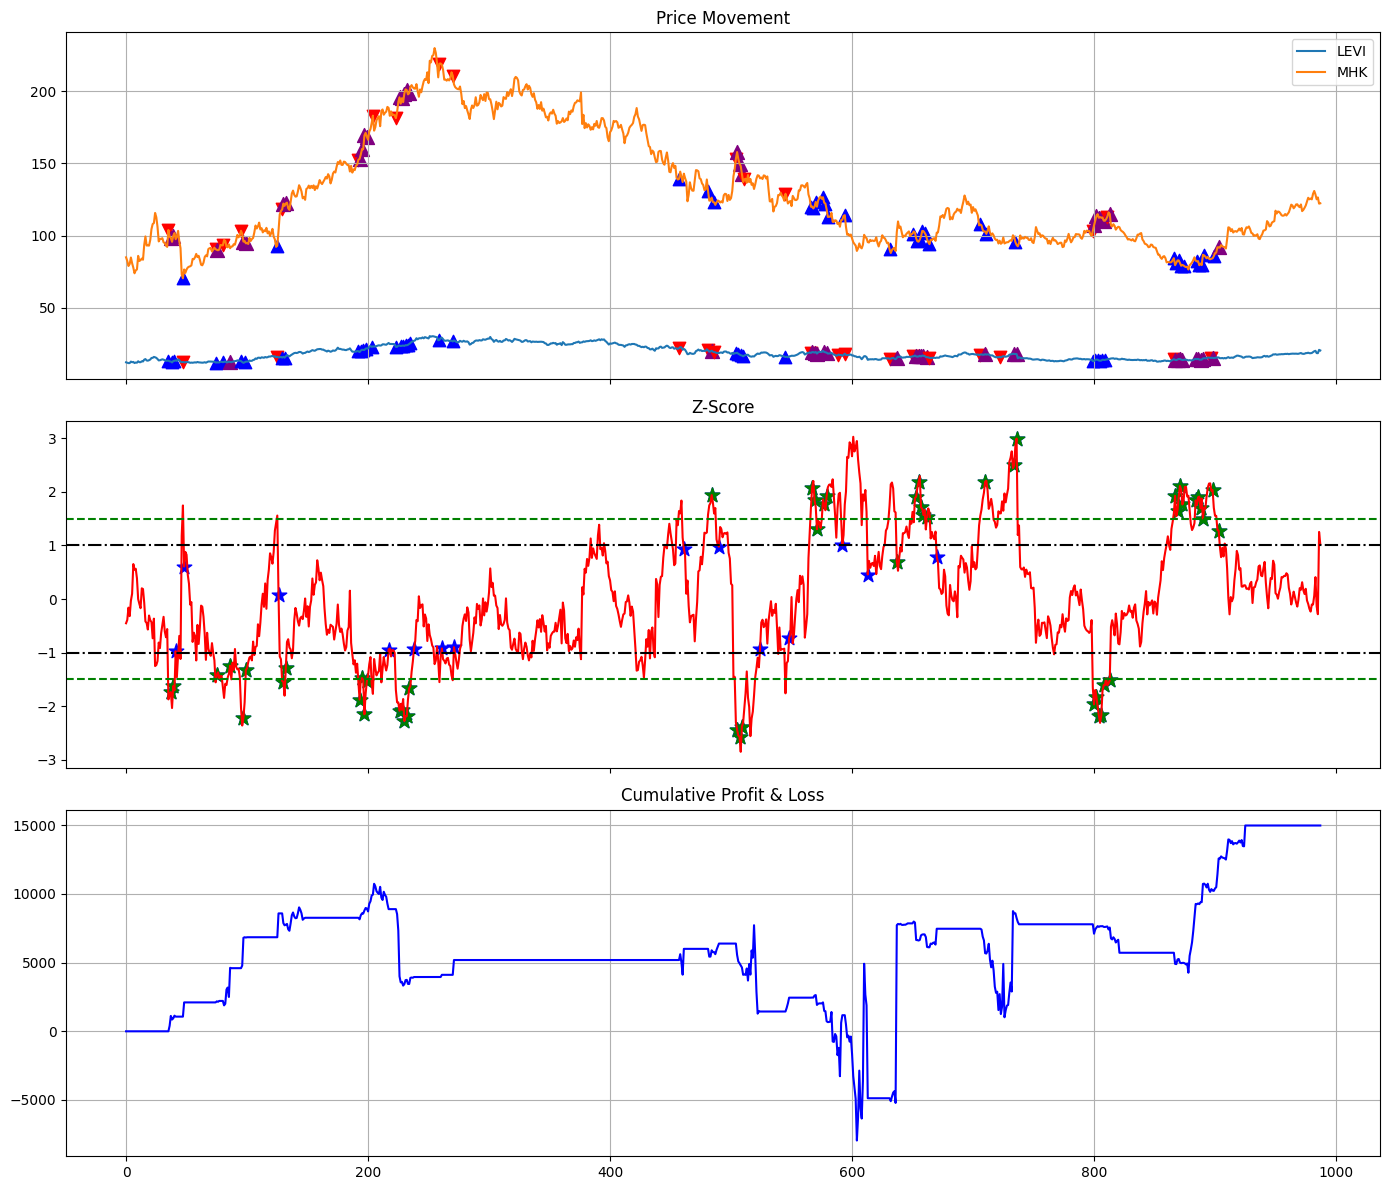

In [107]:
train_trading_data = prepare_data_and_run(train, train, "LEVI", "MHK")

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '111.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


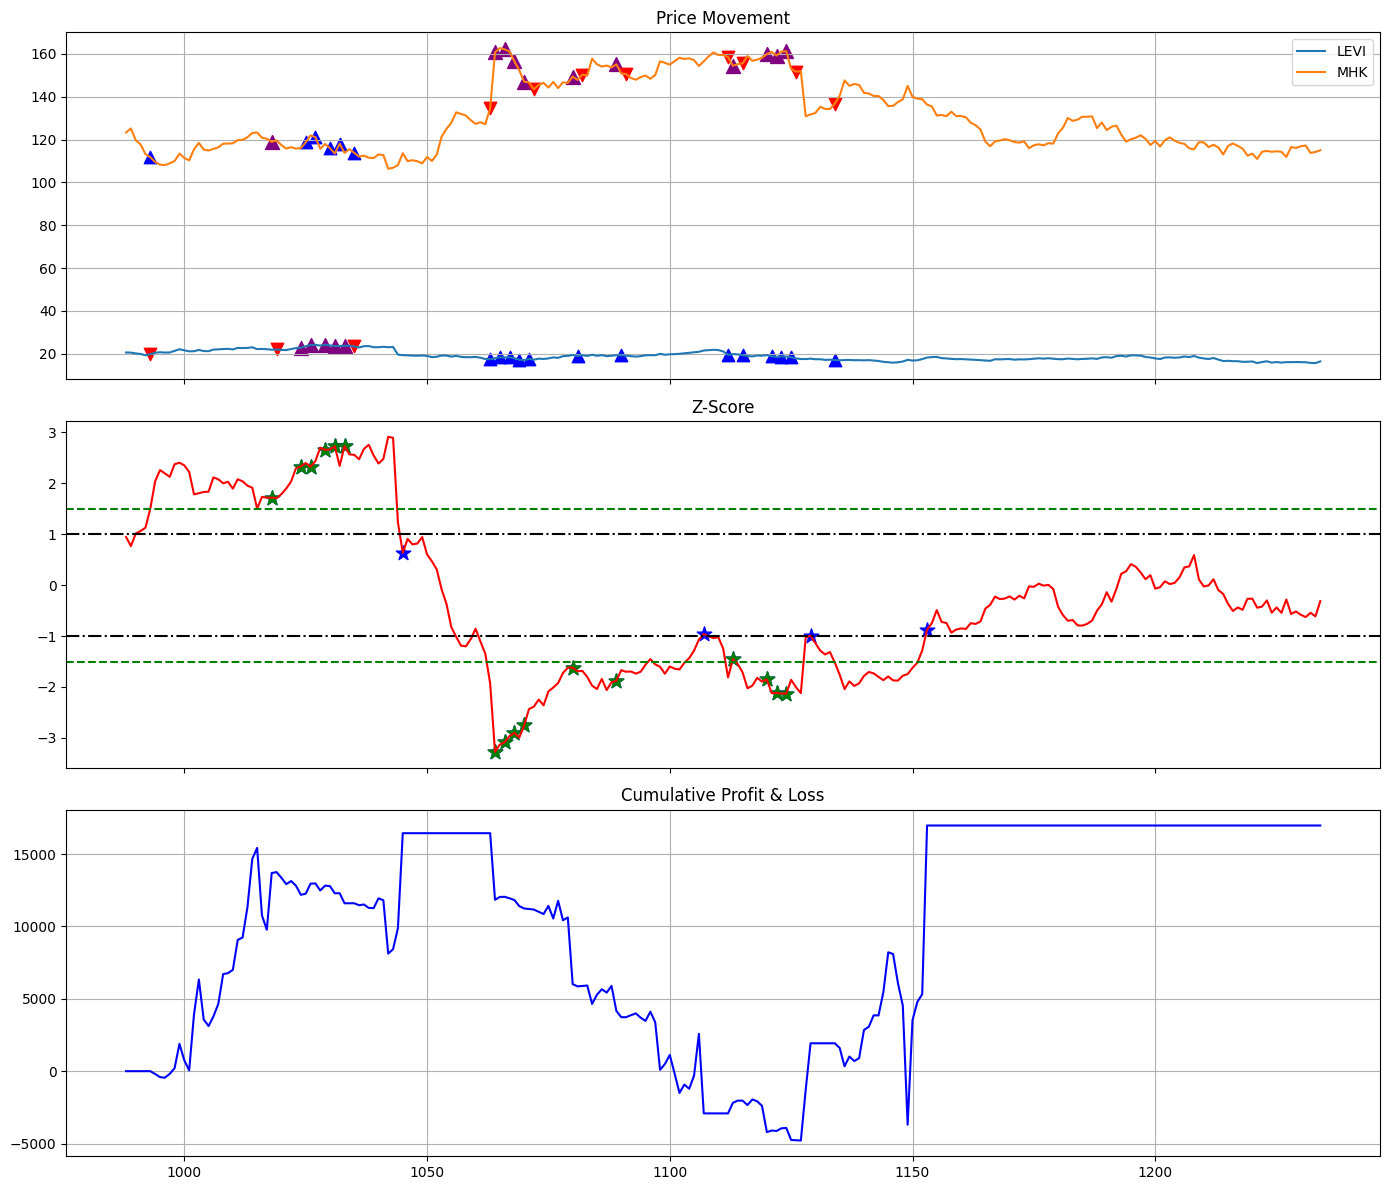

In [109]:
test_trading_data = prepare_data_and_run(train, test, "LEVI", "MHK")

first let's see how it perform on training data

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.39' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '71.17' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


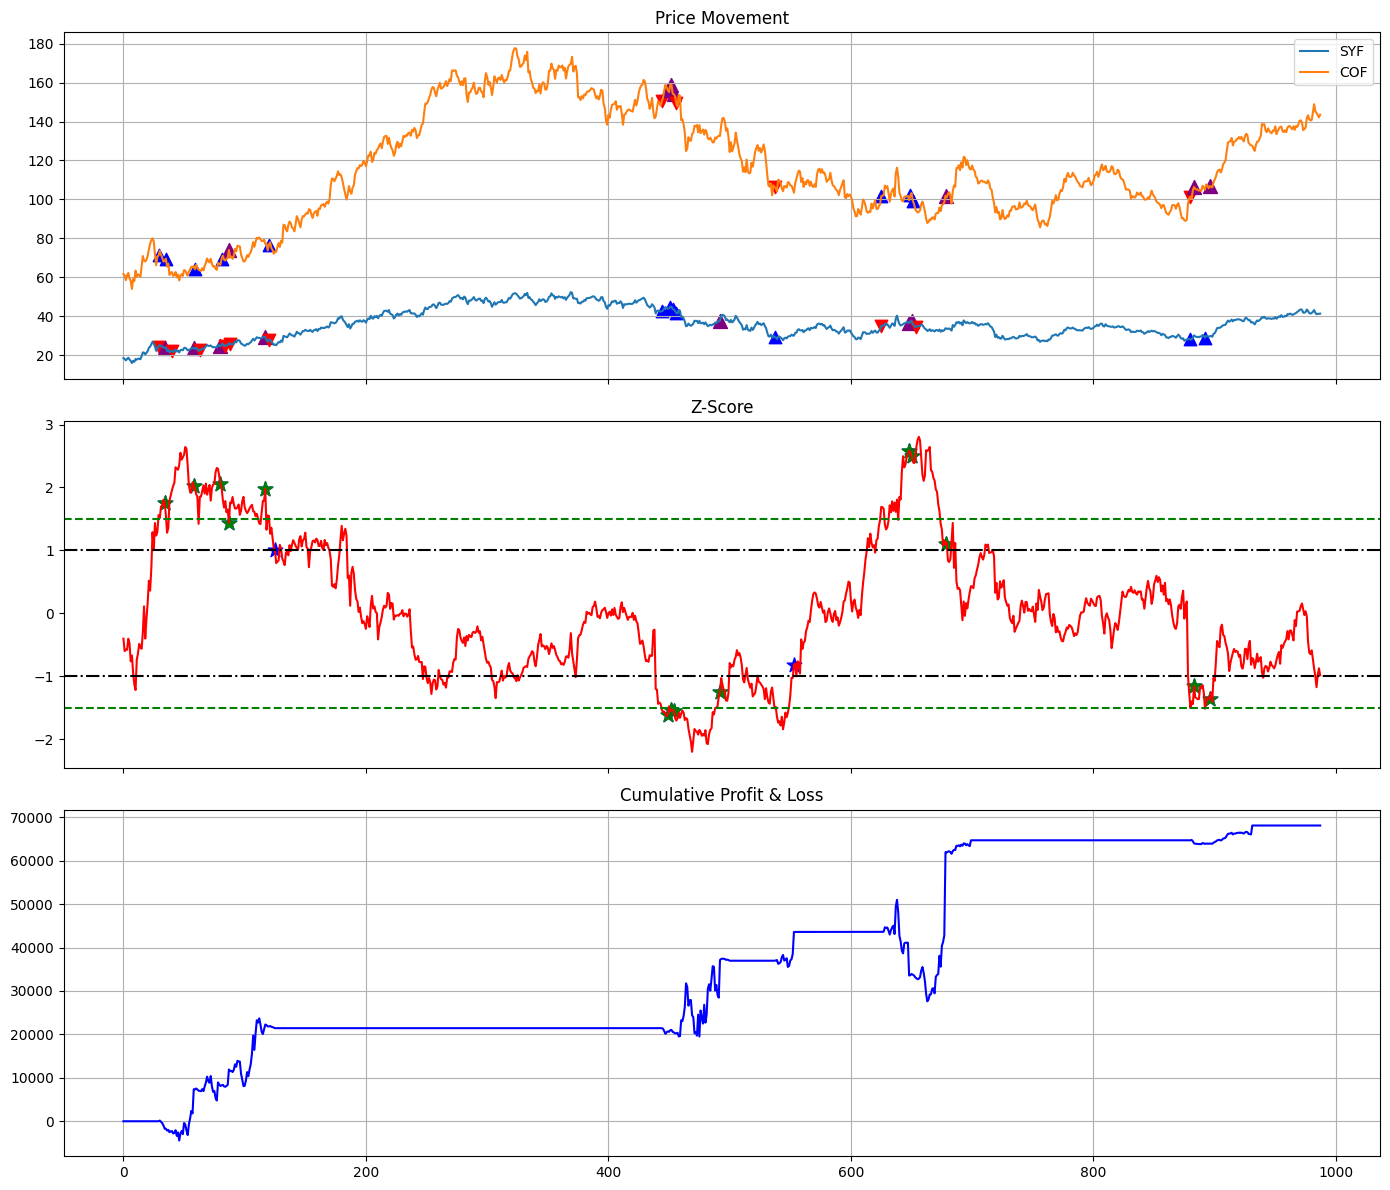

In [108]:
train_trading_data = prepare_data_and_run(train, train, "SYF", "COF")

it perform not bad and meet with out expectation, now let do test data

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/1758194801.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.11' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/1758194801.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '139.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


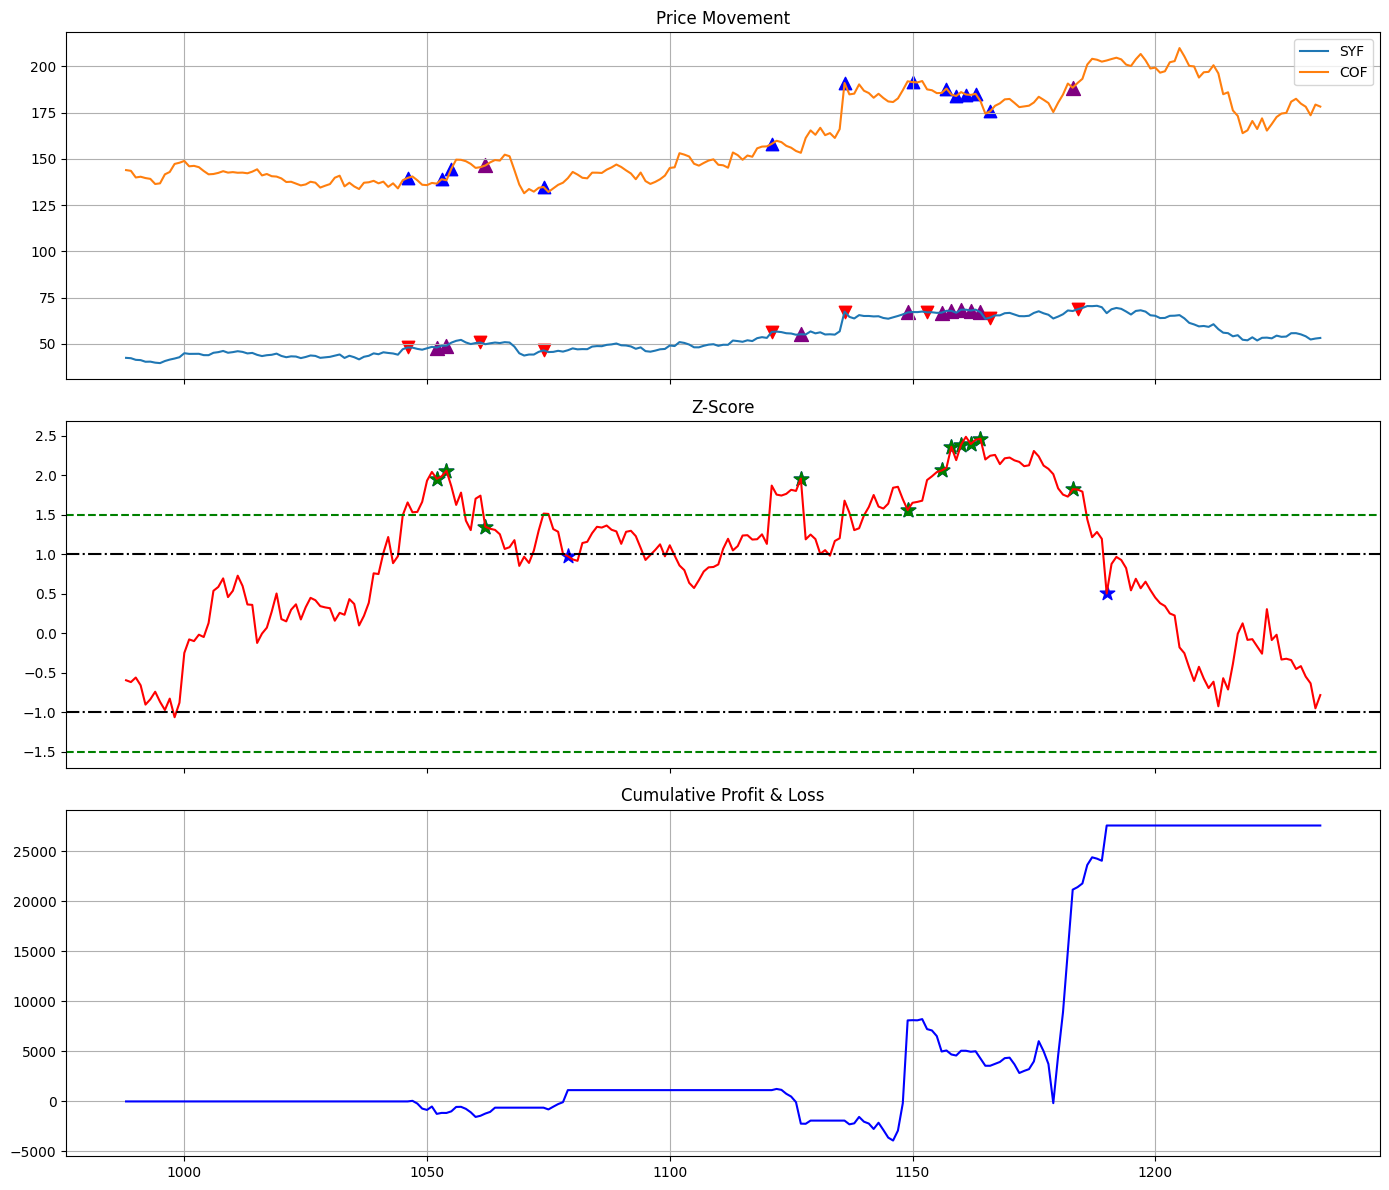

In [76]:
train_trading_data = prepare_data_and_run(train, test, "SYF", "COF")

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/1758194801.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '178.44' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_76730/1758194801.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '273.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


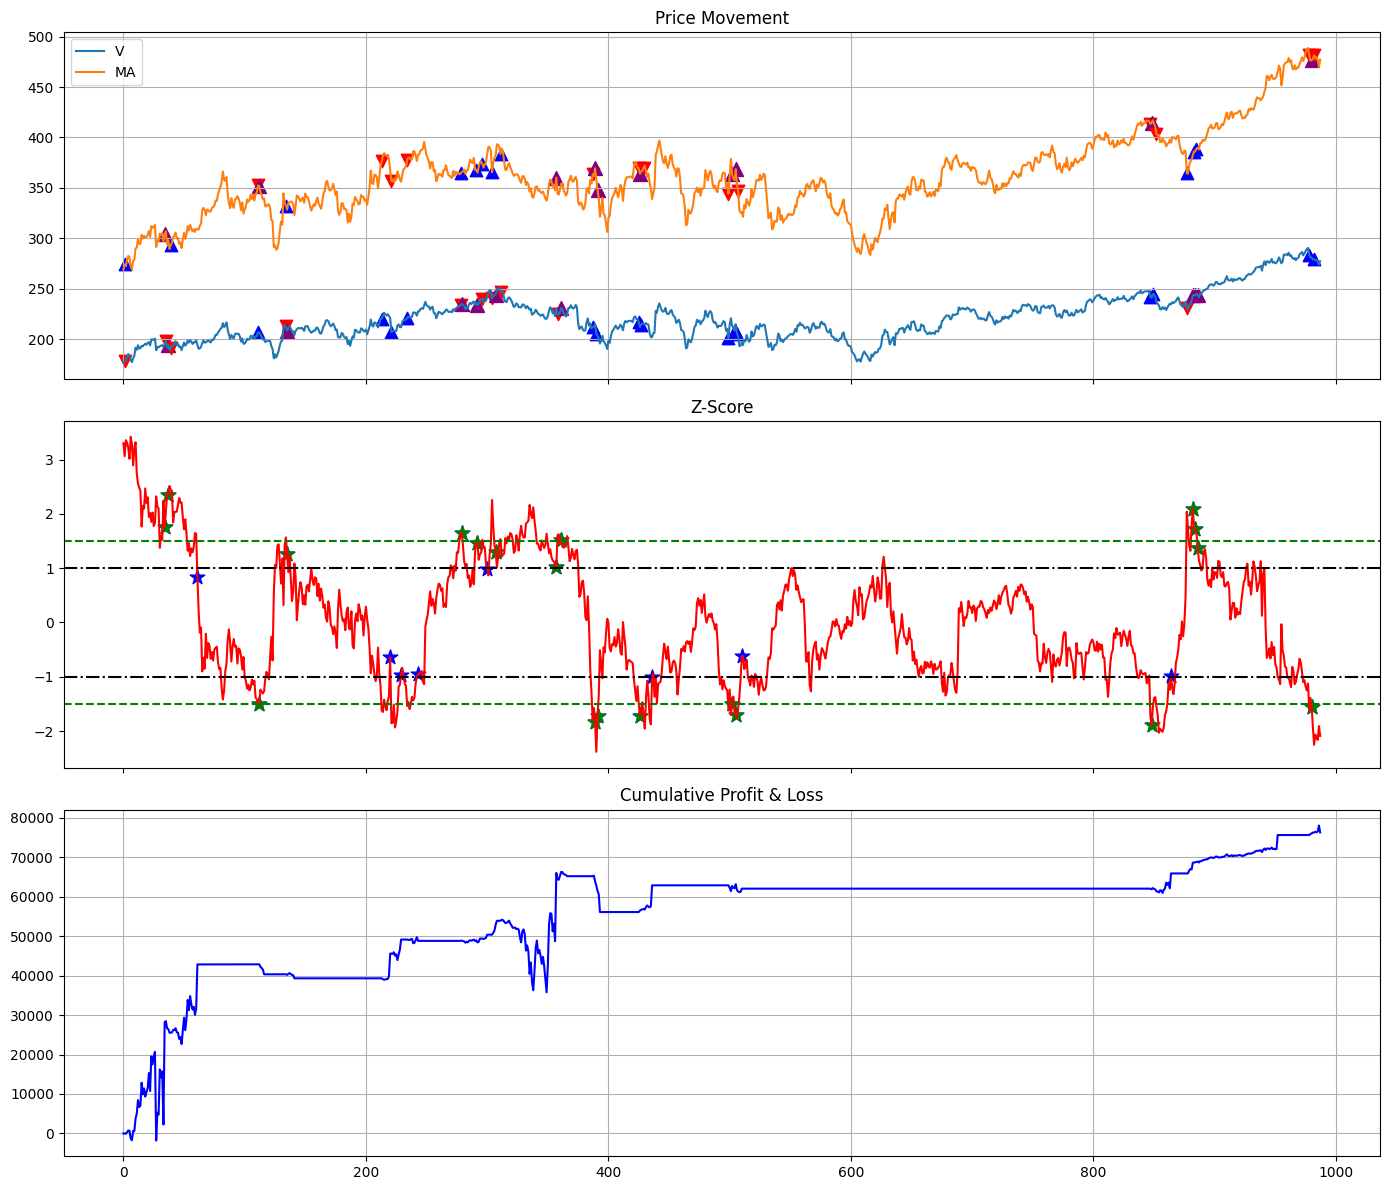

In [77]:
train_trading_data = prepare_data_and_run(train, train, "V", "MA")

In [113]:
train_trading_data

,SYF,COF,spread,zscore,SYF_strong_trend,COF_strong_trend,SYF_position,COF_position,SYF_cost,COF_cost,strategy,close_action,daily_pnl,cumulative_pnl,portfolio_value
0,18.43,61.59,-1.206520,-0.402591,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
1,18.00,60.96,-1.219846,-0.600828,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
2,17.30,58.49,-1.218149,-0.577534,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
3,17.99,60.82,-1.218103,-0.579278,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
4,18.62,62.20,-1.206119,-0.404428,False,False,0,0,0.0,0.0,none,False,0.0,0.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,41.75,145.30,-1.247101,-0.996509,False,True,0,0,0.0,0.0,none,False,0.0,68101.71,168101.71
984,41.00,144.41,-1.259084,-1.174308,False,True,0,0,0.0,0.0,none,False,0.0,68101.71,168101.71
985,41.21,143.27,-1.246050,-0.983381,False,True,0,0,0.0,0.0,none,False,0.0,68101.71,168101.71
986,41.19,142.13,-1.238547,-0.873835,False,True,0,0,0.0,0.0,none,False,0.0,68101.71,168101.71


# Blotter and Lotter

In [124]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start='2024-04-01', end='2025-04-01')
trading_days = pd.date_range(start="2024-04-01", end="2025-04-01", freq="B")

all_trading_days = trading_days[~trading_days.isin(holidays)]

blotter = test_trading_data[['LEVI', 'MHK', 'strategy', 'zscore', 'close_action', 'daily_pnl']]
blotter.index = all_trading_days[:len(blotter)]
blotter.head()

,LEVI,MHK,strategy,zscore,close_action,daily_pnl
2024-04-01,20.55,123.29,none,0.943031,False,0.0
2024-04-02,20.50,125.15,none,0.764991,False,0.0
2024-04-03,20.09,119.67,none,1.010862,False,0.0
2024-04-04,19.86,117.68,none,1.060928,False,0.0
2024-04-05,19.23,113.17,none,1.126067,False,0.0


In [126]:
lodger = test_trading_data[['LEVI', 'MHK', 'LEVI_position', 'MHK_position', 'cumulative_pnl', 'portfolio_value']]
lodger.index = all_trading_days[:len(lodger)]
lodger

,LEVI,MHK,LEVI_position,MHK_position,cumulative_pnl,portfolio_value
2024-04-01,20.55,123.29,0,0,0.00,100000.00
2024-04-02,20.50,125.15,0,0,0.00,100000.00
2024-04-03,20.09,119.67,0,0,0.00,100000.00
2024-04-04,19.86,117.68,0,0,0.00,100000.00
2024-04-05,19.23,113.17,0,0,0.00,100000.00
...,...,...,...,...,...,...
2025-03-20,16.04,116.86,0,0,16972.94,116972.94
2025-03-21,15.98,117.19,0,0,16972.94,116972.94
2025-03-24,15.69,113.74,0,0,16972.94,116972.94
2025-03-25,15.59,114.18,0,0,16972.94,116972.94


In [121]:
lodger.to_csv("lodger.csv", index=True)

let's test if we have trend following for another pair